<a href="https://colab.research.google.com/github/Diego-CB/Lista_1/blob/main/Lista_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio No.1
- Diego Cordova 20212
- Paola de León 20361
- Gabriela Contreras 20213

### EJERCICIO NO.1

**OpenCV**
- *Lectura de imagenes*
```
<!-- args: image file -->
image = cv2.imread("image_path.jpg")
```

- *Convertir img a array*
  - Abrir la imagen con cv2.imred retorna la imagen en un array de Numpy, cada valor del array corresponde a un pixel de la imagen.

- *Convertir de array a img*
```
bgr_img = cv2.cvtColor(array_imagen, cv2.COLOR_BGR2RGB)
```

- *Guardar imagenes a disco duro*
```
 <!-- args: img , file path  -->
 cv2.imwrite(file_path, img)
```

- *Almacenamiento de imagenes en memoria*
  -  las imágenes son matrices NumPy multidimensionales



**PIL**
- *Lectura de imagenes*
```
<!-- args: image path -->
image = Image.open("image.jpg")
```

- *Convertir img a array*
```
<!-- args: image file -->
numpy_array = np.array(img)
```

- *Convertir de array a img*
```
<!-- args: numpy_array -->
m = Image.fromarray(array)
```

- Almacenamiento de imagenes en memoria
  - las imagenes se pueden convertir a un Numpy array decuardo a las necesides del usuario

- *Guardar imagenes a disco duro*
```
<!-- args: Nombre y formato de salida -->
 new_image.save("image_1.jpg")
```






**Matplotlib**
- *Guardar imagenes a disco duro*
```
<!-- args: Nombre y formato de salida -->
plt.savefig("output.jpg")
```



## Ejercicio No. 2
Tomar dos fotos de una misma escena pero con diferentes iluminaciones. Leer las imágenes correspondientes en Python y
hacer lo siguiente:
1. Construir en ambos casos los histogramas normalizados R,G,B (puede usar los 256 bines, u otra cantidad, por ejemplo 16 bines por cada canal de color).

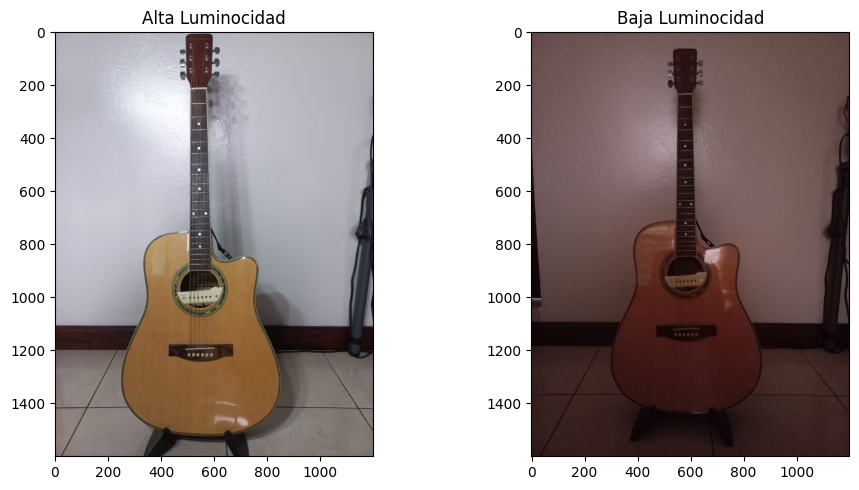

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

# Ruta de las dos imágenes
imagen1_path = './high_light.jpg'
imagen2_path = './Low_Light.jpg'

# Abrir las imágenes con Pillow
imagen1 = Image.open(imagen1_path)
imagen2 = Image.open(imagen2_path)

# Mostrar las imágenes en pantalla
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(imagen1)
axs[0].set_title('Alta Luminocidad')

axs[1].imshow(imagen2)
axs[1].set_title('Baja Luminocidad')

# Ajustar diseño y mostrar
plt.tight_layout()
plt.show()


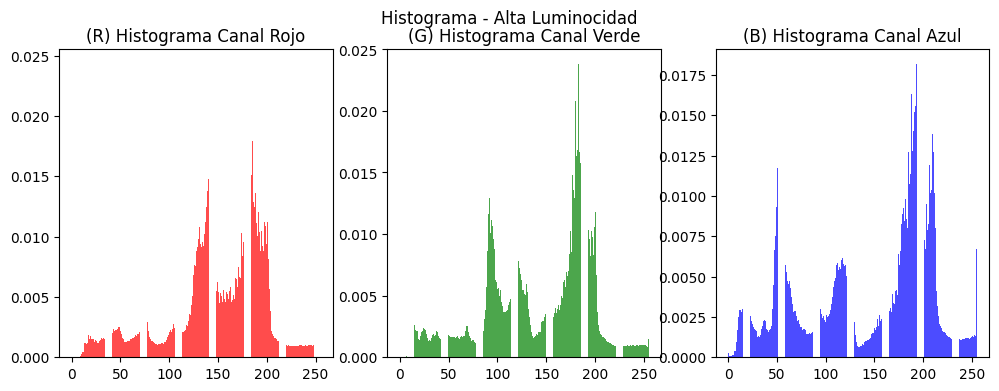

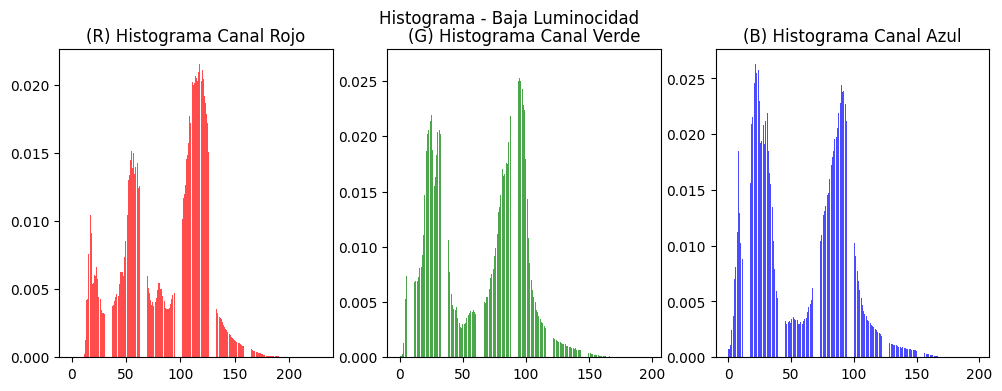

In [2]:
import numpy as np

def plot_rgb_histogram(imagen, title):
    # Convertir la imagen a un array de Numpy
    img_array = np.array(imagen)

    # Obtener los canales RGB
    red_channel = img_array[:,:,0]
    green_channel = img_array[:,:,1]
    blue_channel = img_array[:,:,2]

    # Crear histogramas para cada canal
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.hist(red_channel.ravel(), bins=256, color='red', alpha=0.7, rwidth=0.8, density=True)
    plt.title('(R) Histograma Canal Rojo')

    plt.subplot(1, 3, 2)
    plt.hist(green_channel.ravel(), bins=256, color='green', alpha=0.7, rwidth=0.8, density=True)
    plt.title('(G) Histograma Canal Verde')

    plt.subplot(1, 3, 3)
    plt.hist(blue_channel.ravel(), bins=256, color='blue', alpha=0.7, rwidth=0.8, density=True)
    plt.title('(B) Histograma Canal Azul')

    plt.suptitle(title)
    plt.show()

# Abrir las imágenes con Pillow
imagen1 = Image.open(imagen1_path)
imagen2 = Image.open(imagen2_path)

# Mostrar histogramas RGB para ambas imágenes
plot_rgb_histogram(imagen1, 'Histograma - Alta Luminocidad')
plot_rgb_histogram(imagen2, 'Histograma - Baja Luminocidad')


2. Proponer una distancia que permita comparar dos histogramas.


3. Comparar las distancias obtenidas entre las dos fotos tomadas, y otras fotos de su elección, no relacionadas con sus fotos. Evaluar por ejemplo la distribución de las distancias obtenidas.

4. Ahora, convertir cada imagen RGB a HSV.


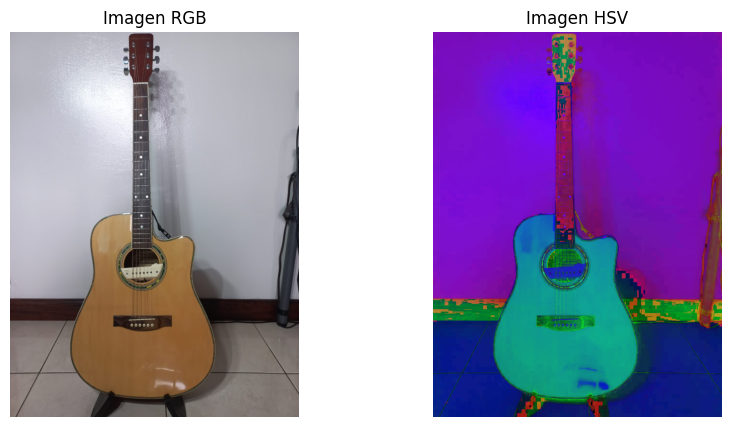

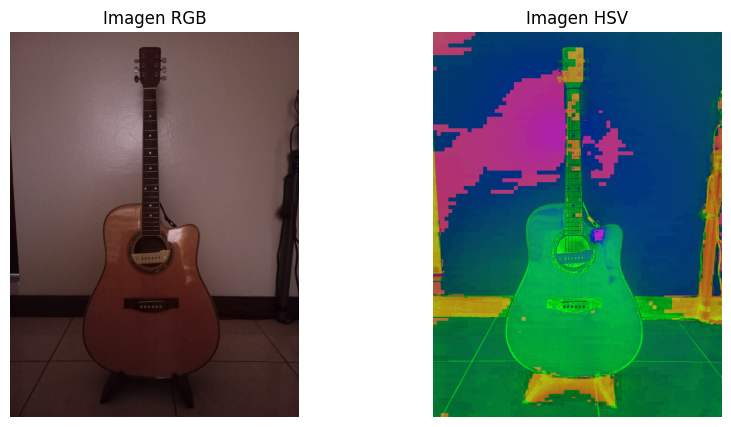

In [3]:
import cv2
import matplotlib.pyplot as plt

def rgb_to_hsv(image):
    # Convertir la imagen de RGB a HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    return hsv_image


def show_rgb_hsv(path):
    
  # Abrir la imagen con OpenCV
  imagen_rgb = cv2.imread(path)
  imagen_rgb = cv2.cvtColor(imagen_rgb, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB

  # Convertir a HSV
  imagen_hsv = rgb_to_hsv(imagen_rgb)

  # Mostrar las imágenes original y en formato HSV
  plt.figure(figsize=(10, 5))

  plt.subplot(1, 2, 1)
  plt.imshow(imagen_rgb)
  plt.title('Imagen RGB')
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.imshow(imagen_hsv)
  plt.title('Imagen HSV')
  plt.axis('off')

  plt.show()

show_rgb_hsv('./high_light.jpg')
show_rgb_hsv('./Low_Light.jpg')



5. Construir esta vez histogramas en H,S (en 2D) y repetir el paso 3.

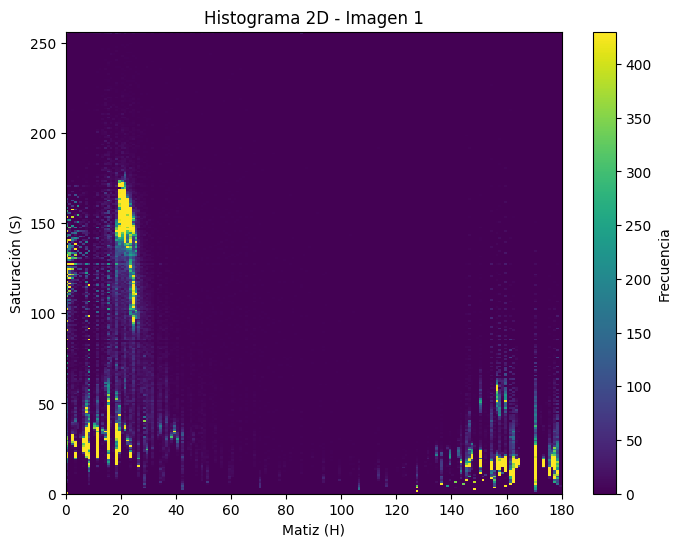

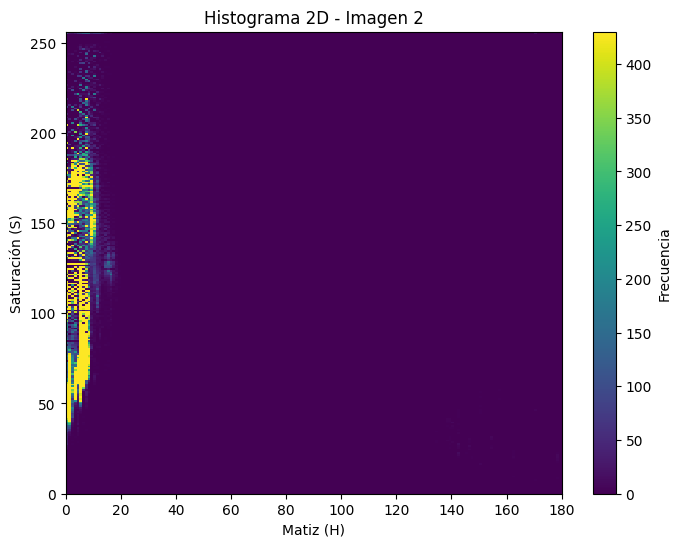

In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def plot_hsv_histogram_2d(image, title, vmax_value=250 + 180):
    # Convertir la imagen a formato HSV
    hsv_image = image.convert('HSV')

    # Obtener los canales H y S
    h_channel = np.array(hsv_image)[:,:,0]
    s_channel = np.array(hsv_image)[:,:,1]

    # Crear histograma 2D para H y S con escala fija en el colorbar
    plt.figure(figsize=(8, 6))
    plt.hist2d(h_channel.ravel(), s_channel.ravel(), bins=(180, 256), cmap='viridis', vmax=vmax_value, range=[[0, 180], [0, 256]])
    plt.colorbar(label='Frecuencia')
    plt.title(title)
    plt.xlabel('Matiz (H)')
    plt.ylabel('Saturación (S)')
    plt.show()

# Abrir las imágenes con Pillow
imagen1 = Image.open(imagen1_path)
imagen2 = Image.open(imagen2_path)

# Mostrar histogramas 2D para los canales H y S de ambas imágenes con escala fija en el colorbar
plot_hsv_histogram_2d(imagen1, 'Histograma 2D - Imagen 1')
plot_hsv_histogram_2d(imagen2, 'Histograma 2D - Imagen 2')


## Ejercicio No. 3

In [5]:
! pip install opencv-python
! pip install numpy
! pip install matplotlib


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


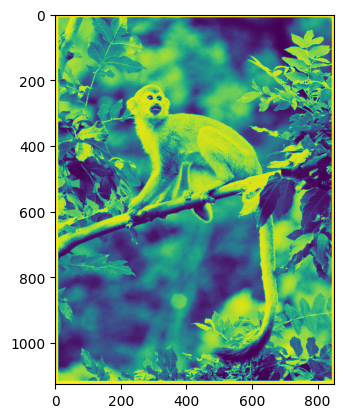

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Lectura de la imagen
img = cv2.imread("monkey.jpeg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

# Histograma sin equalizar
img = cv2.equalizeHist(img)
plt.imshow(img)


## Ejercicio No. 4

## Ejercicio No. 5

## Ejercicio No. 6